In [3]:
#Importing the Relevant Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df=pd.read_csv("../input/train_homeprice.csv")
df_test=pd.read_csv("../input/test_homeprice.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [13]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [16]:
df.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


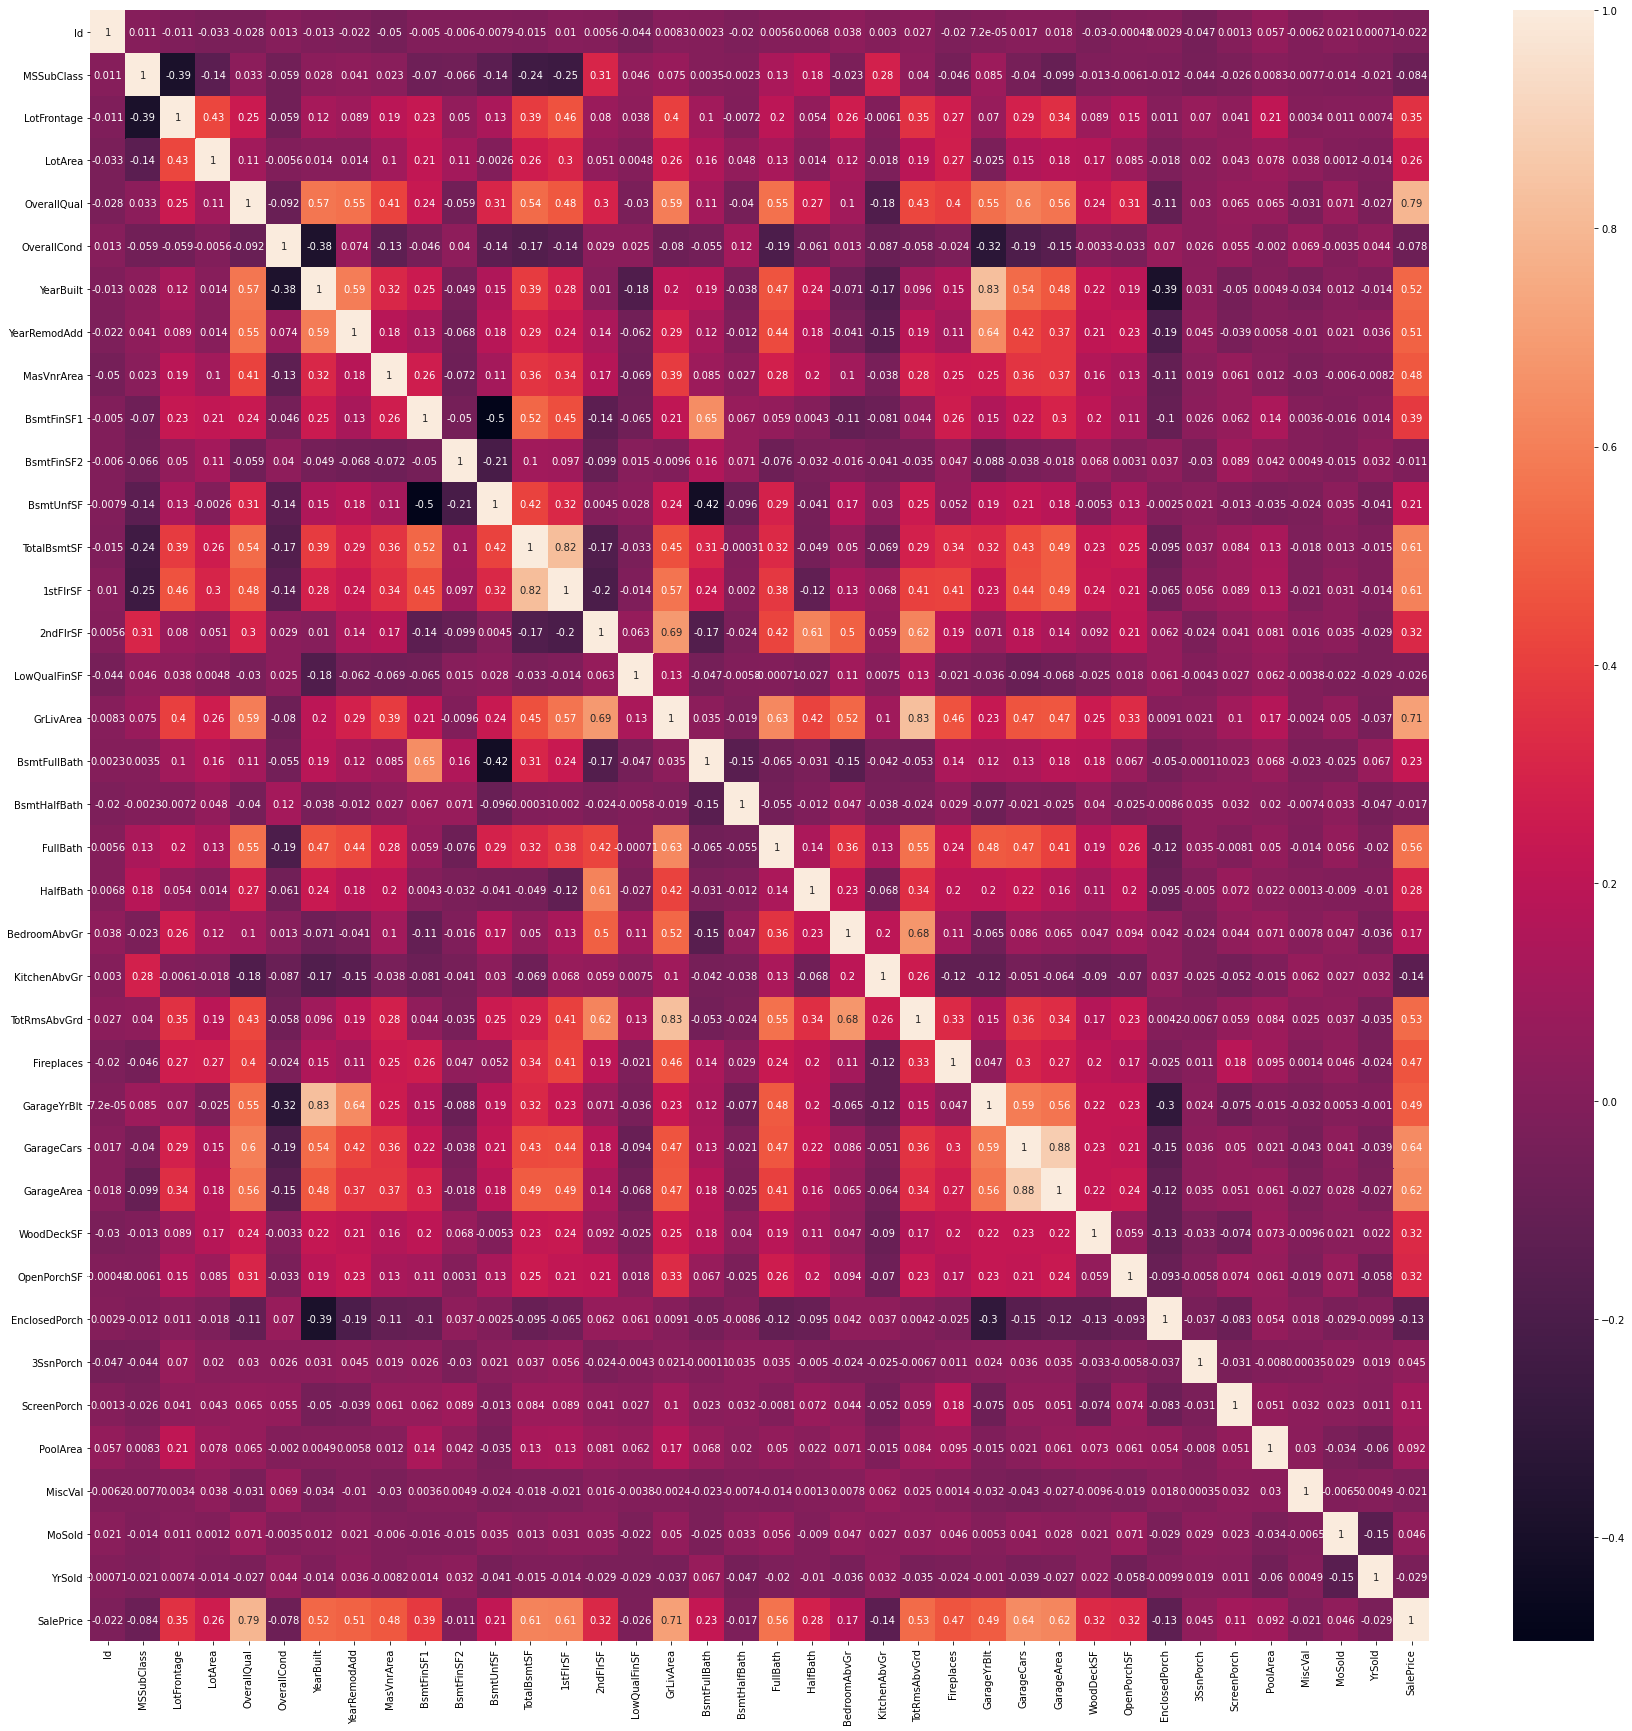

In [34]:

num_cols = df.columns[df.dtypes != 'object']
print(num_cols)
plt.figure(figsize=[30,30])
corr_mat = df[num_cols].corr()

sns.heatmap(corr_mat,annot =True);


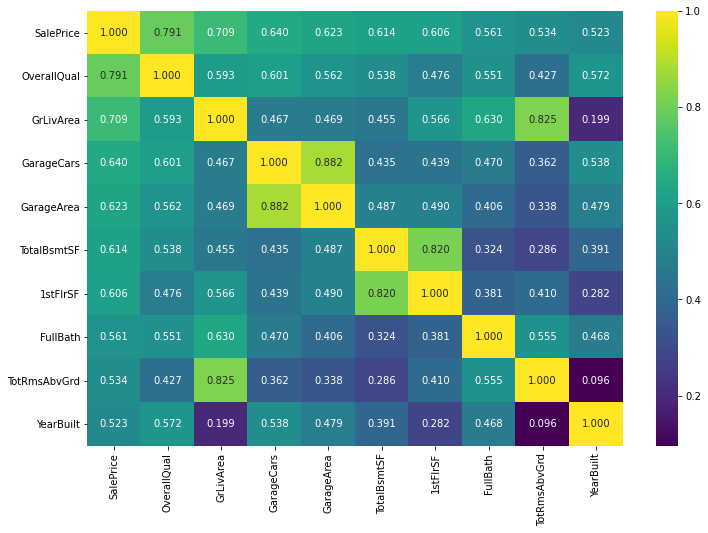

In [35]:
corr_h_cols = corr_mat.nlargest(10, 'SalePrice').index # highest 10 correlated columns with SalePrice
cm = np.corrcoef(df[corr_h_cols].values.T)
plt.subplots(figsize=(12, 8))
sns.heatmap(cm, cmap='viridis', annot=True, fmt='0.3f', xticklabels=corr_h_cols.values, yticklabels=corr_h_cols.values);

In [36]:
num_cols_h = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']


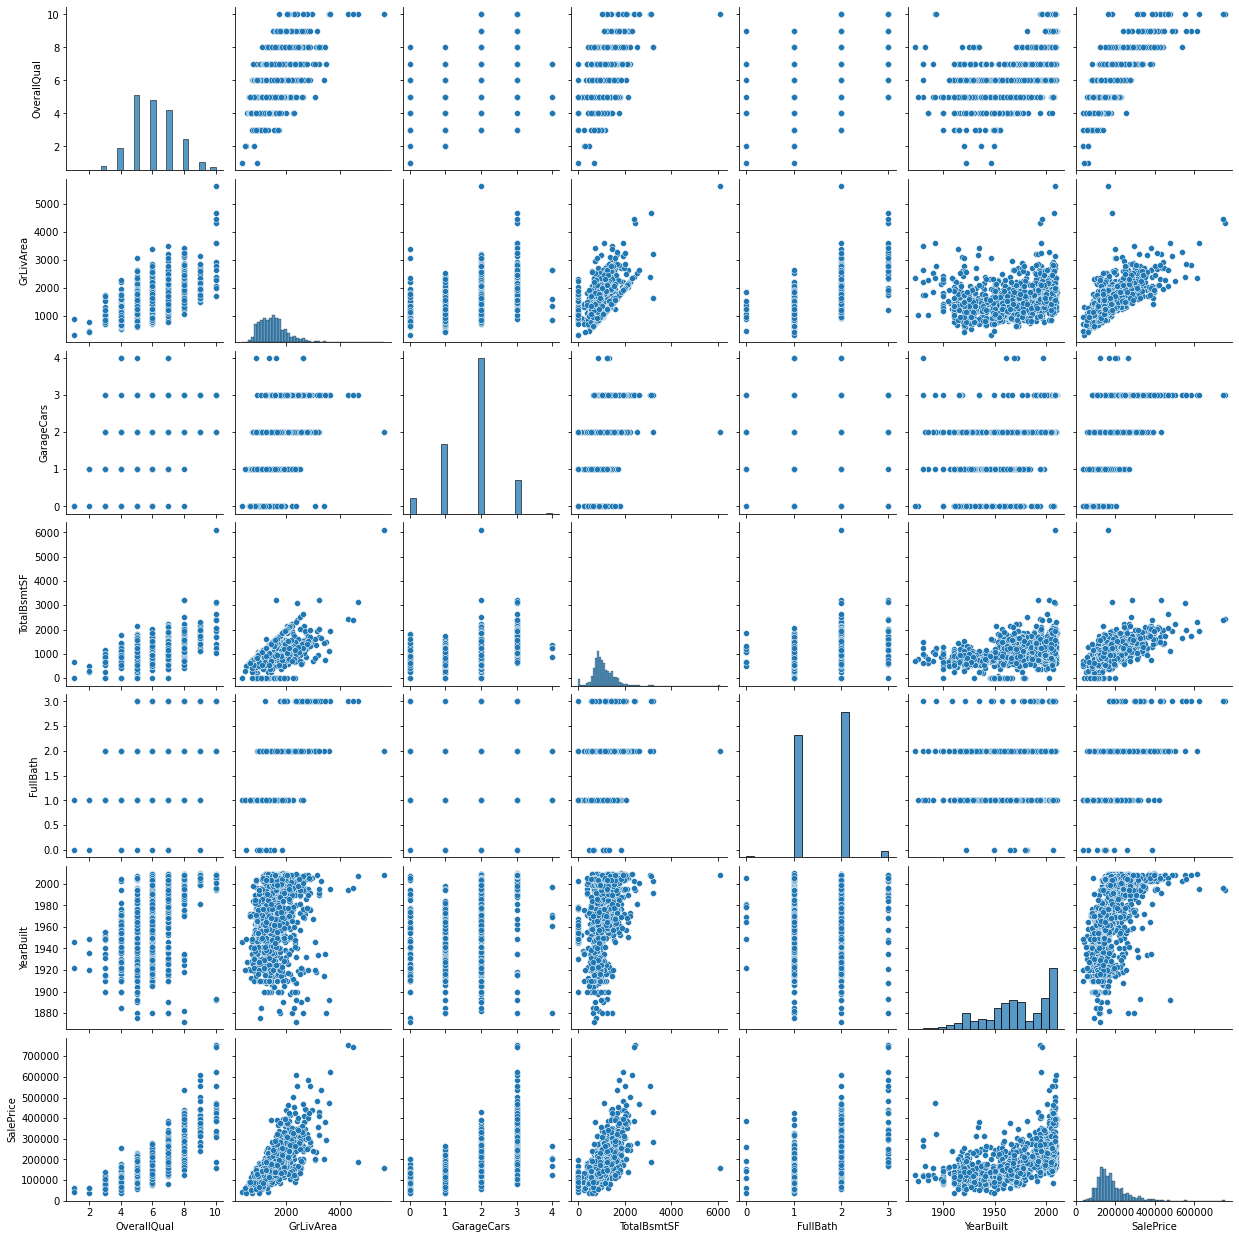

In [37]:
sns.pairplot(df[num_cols_h], height=2.5);


In [40]:
total=df.isnull().sum().sort_values(ascending=False)
percent = total / df.shape[0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# What we get

1)Columns with extreme high percentage >15% of missing values will be deleted as a whole.

2) GarageX features have the same number of missing data. Regardless, most of the garage information is expressed by GarageCars which is considered, so removing these features might not affect our data this much, same to BsmtX features.

3) Regarding MasVnrArea and MasVnrType, we can consider that these variables are not essential. Furthermore, they have a strong correlation with YearBuilt and OverallQual which are already considered. Thus, we will not lose information if we delete MasVnrArea and MasVnrType.

4) Electrical have only 1 missing data so we will remove this observation and keep the variable.



In [46]:
train_c = df.copy()

train_c = train_c.drop((missing_data[missing_data['Total'] > 1]).index, 1)
train_c = train_c.drop(train_c.loc[train_c['Electrical'].isnull()].index)
train_c.isnull().sum().max() # checking that there's no missing data missing


0

<AxesSubplot:>

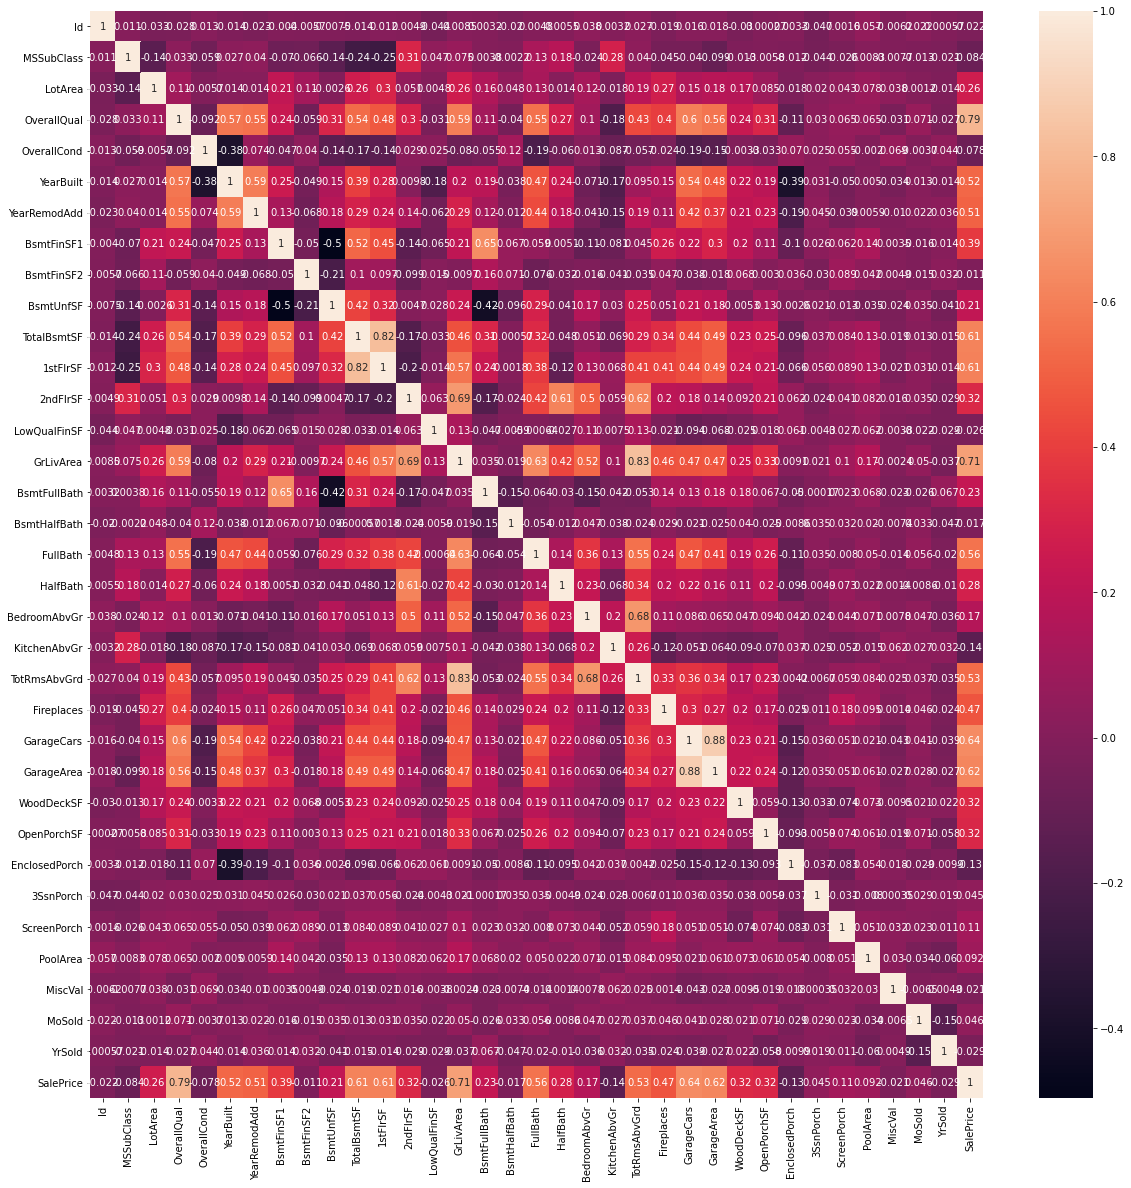

In [47]:
plt.figure(figsize=[20,20])
sns.heatmap(train_c.corr(),annot=True)

In [48]:
# categorical columns
cat_cols = train_c.columns[train_c.dtypes == 'object']
print(cat_cols)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [50]:
from sklearn.feature_selection import mutual_info_regression

def calc_mi_scores(features, target):
    """Calculating the MI (Mutual Information) scores for categorical features"""
    features = features.copy()
    for colname in features.select_dtypes('object'):
        features[colname], _ = features[colname].factorize()    # convert string values to corresponding numerical values
    
    discrete_features = [pd.api.types.is_integer_dtype(i) for i in features.dtypes]
    mi_scores = mutual_info_regression(features, target, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=features.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, labels=ticks)
    plt.title('Mutual Information Score')


In [51]:
X = train_c.copy()
X.pop('Id')                 # remove the Id column before calculating mi_scores
y = X.pop('SalePrice')

mi_scores = calc_mi_scores(X, y)


In [52]:
print(mi_scores.head(20))


OverallQual     0.569699
Neighborhood    0.528950
GarageArea      0.494550
GrLivArea       0.431268
YearBuilt       0.410317
TotalBsmtSF     0.396863
LotArea         0.392986
GarageCars      0.365374
ExterQual       0.326329
KitchenQual     0.318875
1stFlrSF        0.285012
MSSubClass      0.283417
YearRemodAdd    0.278838
FullBath        0.269869
TotRmsAbvGrd    0.213132
Foundation      0.198668
OpenPorchSF     0.191534
HeatingQC       0.170629
Fireplaces      0.166899
Exterior2nd     0.163224
Name: MI Scores, dtype: float64


In [53]:
train_c.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


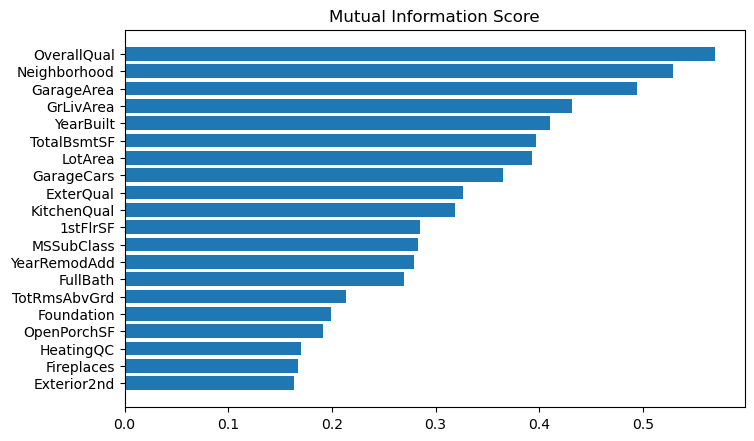

In [54]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))


In the previous plot we see 20 features having the highest mutual information with the target, comparing to real life scenarios:

1.Quality of everything (overall, kitchen, exter) are very important.

2.Neighborhood (location) is also highly affecting the price of the apartment.

3.Sizes (Area, sf) are highly related, ..etc.

4.Also the highest relevant categorical features are Neighborhood, ExterQual, KitchenQual, MSSubClass, let's see these in action

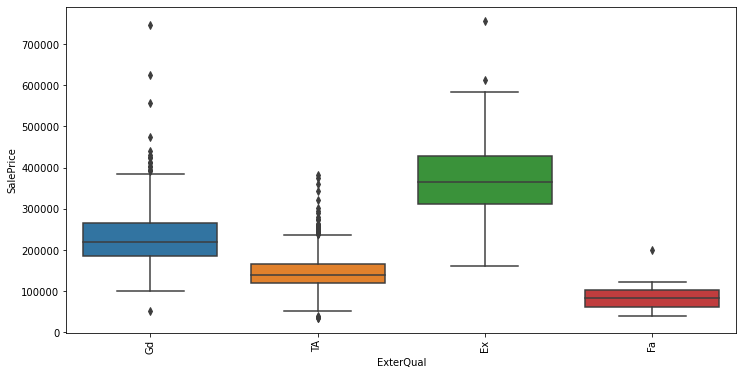

In [58]:

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['ExterQual'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


What we get:

As expected the better the quality the higher the apartment price.

1.Apartments with Excellent ExterQual mean price = 350k

2.Apartments with Good ExterQual mean price = 220k

3.Apartments with Typical/avg ExterQual mean price = 160k

4.Apartments with Fair ExterQual mean price = 80k


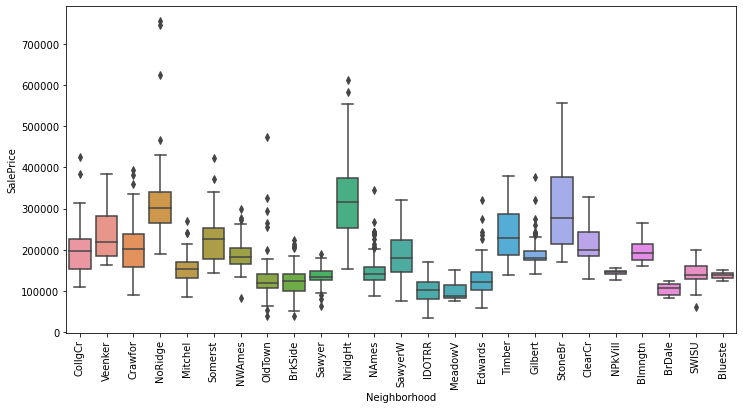

In [57]:

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['Neighborhood'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


Some Neighborhoods are quite expensive than others (may be they're have a nice view, or far from noise or pollution, more private, ..etc.). Looks like the most expensive neighboorhod is the NridgHt (Northridge Heights). Seeing pictures on Google it's quite lovely!



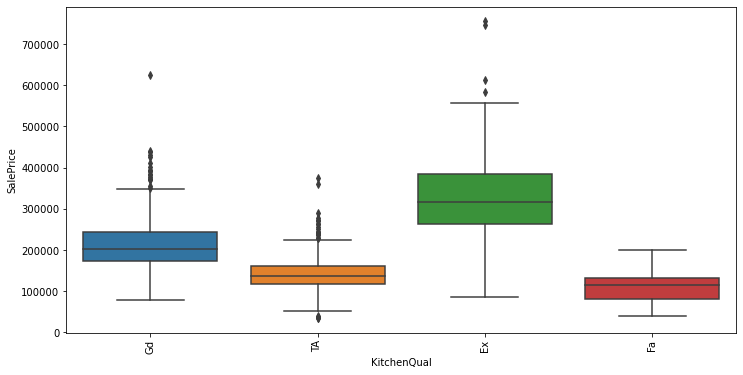

In [59]:

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['KitchenQual'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


What we get

# As with ExterQual:

1.Apartments with Excellent KitchenQual mean price = 320k

2.Apartments with Good KitchenQual mean price = 205k

3.Apartments with Typical/avg KitchenQual mean price = 140k

4.Apartments with Fair KitchenQual mean price = 125k


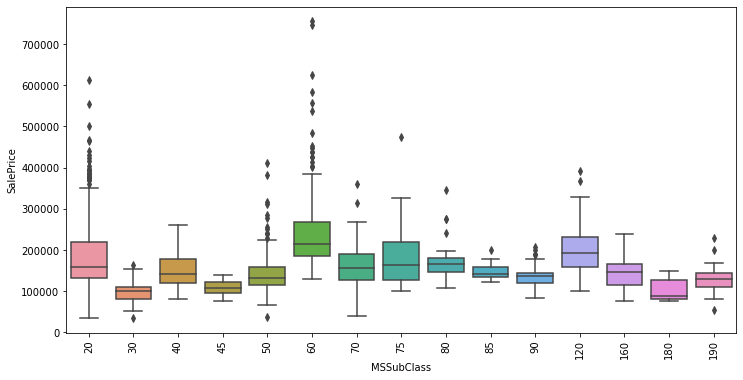

In [60]:

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['MSSubClass'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


Looks like a light sea wave, type of dweeling seems to have only a slight effect on the price as opposed to Neighborhood. Looks like it's better to not be considered.



In [61]:
# Categorical feature selection
cat_cols_h = ['Neighborhood', 'ExterQual', 'KitchenQual']
cols_final = cat_cols_h + num_cols_h
train_f = train_c[cols_final].copy()
train_f.head(2)


,Neighborhood,ExterQual,KitchenQual,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,CollgCr,Gd,Gd,7,1710,2,856,2,2003,208500
1,Veenker,TA,TA,6,1262,2,1262,2,1976,181500


In [62]:
train_f = pd.get_dummies(train_f, drop_first=True)
train_f.head()


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,1710,2,856,2,2003,208500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6,1262,2,1262,2,1976,181500,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,7,1786,2,920,2,2001,223500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,7,1717,3,756,1,1915,140000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,8,2198,3,1145,2,2000,250000,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Feature Selection

Using the highest correlated features in the numeric features analysis, along with the features with high MI score in selecting our most relevant features.



In [63]:
# Categorical feature selection
cat_cols_h = ['Neighborhood', 'ExterQual', 'KitchenQual']
cols_final = cat_cols_h + num_cols_h
train_f = train_c[cols_final].copy()
train_f.head(2)


,Neighborhood,ExterQual,KitchenQual,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,CollgCr,Gd,Gd,7,1710,2,856,2,2003,208500
1,Veenker,TA,TA,6,1262,2,1262,2,1976,181500


In [64]:
train_f = pd.get_dummies(train_f, drop_first=True)
train_f.head()


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,1710,2,856,2,2003,208500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6,1262,2,1262,2,1976,181500,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,7,1786,2,920,2,2001,223500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,7,1717,3,756,1,1915,140000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,8,2198,3,1145,2,2000,250000,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Outliers Removal

Number of outliers found: 27


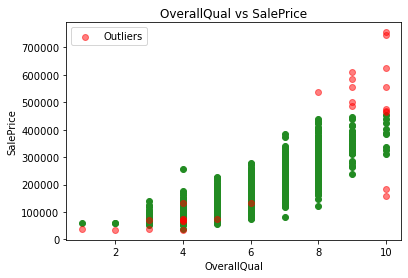

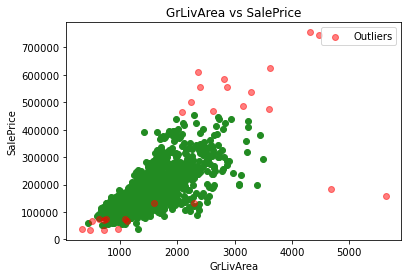

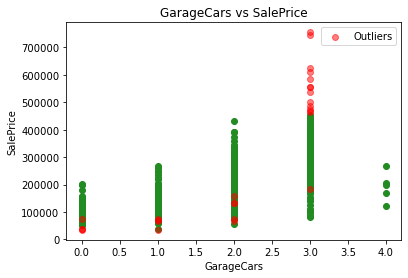

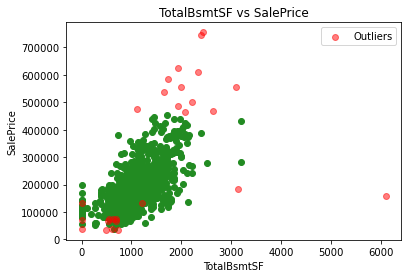

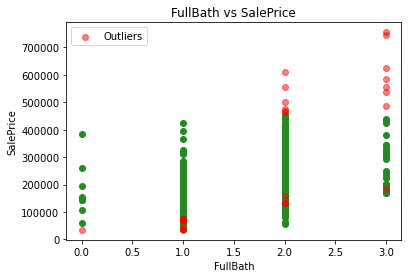

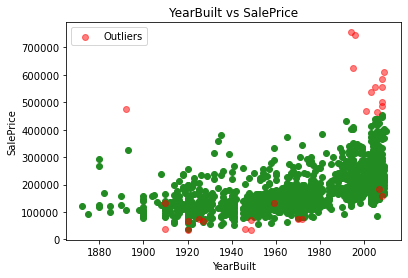

Observations before removing Outliers: (1459, 37)
Observations after removing Outliers: (1432, 37)


In [65]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
good = lof.fit_predict(train_f) == 1
print("Number of outliers found:", (~good).sum())

# Plotting outliers
for col in num_cols_h[:-1]:      # avoid getting SalePrice vs SalePrice
    plt.scatter(train_f[col][good], train_f.SalePrice[good], color='forestgreen')
    plt.scatter(train_f[col][~good], train_f.SalePrice[~good], color='red', alpha=0.5, label='Outliers')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title('{} vs SalePrice'.format(col))
    plt.legend()
    plt.show();
    
# Cleaned data
print("Observations before removing Outliers:", train_f.shape)
train_f = train_f[good]
print("Observations after removing Outliers:", train_f.shape)


# Normalizing data

In [68]:
# transforming
train_f.SalePrice = np.log(train_f.SalePrice)
print("After transformation: {:.3f}".format(train_f.SalePrice.skew()))


After transformation: 0.084


In [70]:
train_f.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,1710,2,856,2,2003,12.247694,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6,1262,2,1262,2,1976,12.109011,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,7,1786,2,920,2,2001,12.317167,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,7,1717,3,756,1,1915,11.849398,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,8,2198,3,1145,2,2000,12.429216,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Skewness: 0.08


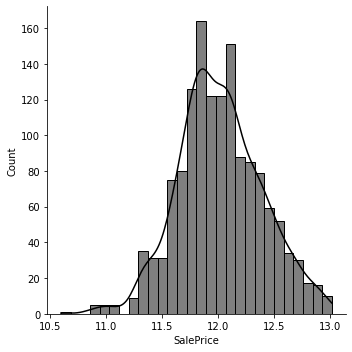

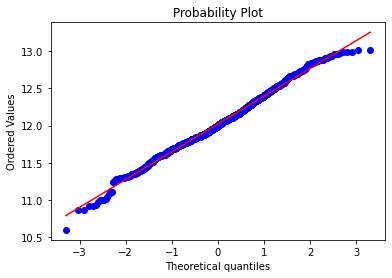

In [69]:
# Target (SalePrice)
import scipy.stats as st

sns.displot(train_f.SalePrice, kde=True, color='black')
plt.figure()
res = st.probplot(train_f.SalePrice, plot=plt, dist='norm')
print('Skewness: {:.2f}'.format(train_f.SalePrice.skew()))


In [77]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           1432 non-null   int64  
 1   GrLivArea             1432 non-null   int64  
 2   GarageCars            1432 non-null   int64  
 3   TotalBsmtSF           1432 non-null   int64  
 4   FullBath              1432 non-null   int64  
 5   YearBuilt             1432 non-null   int64  
 6   SalePrice             1432 non-null   float64
 7   Neighborhood_Blueste  1432 non-null   uint8  
 8   Neighborhood_BrDale   1432 non-null   uint8  
 9   Neighborhood_BrkSide  1432 non-null   uint8  
 10  Neighborhood_ClearCr  1432 non-null   uint8  
 11  Neighborhood_CollgCr  1432 non-null   uint8  
 12  Neighborhood_Crawfor  1432 non-null   uint8  
 13  Neighborhood_Edwards  1432 non-null   uint8  
 14  Neighborhood_Gilbert  1432 non-null   uint8  
 15  Neighborhood_IDOTRR  

# Feature Scaling

In [78]:
X = train_f.copy()
y = X.pop('SalePrice')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols_h[:-1]] = scaler.fit_transform(X[num_cols_h[:-1]])


# Model Building

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# splitting data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [80]:
# Linear Regression approach
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))


Mean Squared Error: 25894.85


In [81]:
# Support Vector Regression approach
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))


Mean Squared Error: 25368.74


In [82]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))


Mean Squared Error: 28245.02


In [83]:
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
accuracies_svr = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=10)
accuracies_xgb = cross_val_score(estimator=xgb_reg, X=X_train, y=y_train, cv=10)

print("""
Linear Regression: acc={:.2f}%, std={:.2f}%
SupVec Regression: acc={:.2f}%, std={:.2f}%
XGBoostRegression: acc={:.2f}%, std={:.2f}%""".format(accuracies_lr.mean()*100, accuracies_lr.std()*100,
                                                      accuracies_svr.mean()*100, accuracies_svr.std()*100,
                                                      accuracies_xgb.mean()*100, accuracies_xgb.std()*100))



Linear Regression: acc=86.84%, std=2.20%
SupVec Regression: acc=86.70%, std=2.26%
XGBoostRegression: acc=83.16%, std=3.55%


In [84]:
SVR().get_params()


{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [85]:
from sklearn.model_selection import GridSearchCV

svc_params = [{'C' : [0.2, 0.5, 1, 2, 5],
               'kernel': ['linear', 'rbf', 'poly'],
               'degree' : [3, 4, 5],
               'gamma': ['scale', 'auto']}]

grid_search = GridSearchCV(estimator=svr, param_grid=svc_params, cv=10, n_jobs=-1)
best_svr = grid_search.fit(X_train, y_train)

# Getting attributes from GridSearch
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best Parameters:", best_params)


Best Accuracy: 86.95%
Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


In [86]:
svr_tuned = best_svr.best_estimator_.fit(X_train, y_train)
svr_tuned.predict(X_val)

y_pred = svr_tuned.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))


Mean Squared Error: 25367.15


# Ensemble modeling

In [87]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor([('lr', lr), ('svr', svr), ('xgb', xgb_reg)])
voting_tun = VotingRegressor([('lr', lr), ('svr', svr_tuned), ('xgb', xgb_reg)])

voting_reg.fit(X_train, y_train)
voting_tun.fit(X_train, y_train)

y_pred = voting_reg.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

y_pred = voting_tun.predict(X_val)
print("Mean Squared Error (tuned): {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))


Mean Squared Error: 25225.42
Mean Squared Error (tuned): 25195.27


# Test data preparation

In [88]:
import math

test_f = df_test.copy()
test_f = test_f[cols_final[:-1]]                                           # feature selection
test_f = pd.get_dummies(test_f, drop_first=True)                           # getting dummies
test_f[num_cols_h[:-1]] = scaler.transform(test_f[num_cols_h[:-1]])        # feature scaling
# X.shape[1] == test_f.shape[1]               # dim check

# check for missing
test_f['GarageCars'].fillna(math.ceil(test_f['GarageCars'].mean()), inplace=True)
test_f['TotalBsmtSF'].fillna(test_f['TotalBsmtSF'].median(), inplace=True)

In [90]:
# svr model (untuned)
predictions_svr = np.exp(svr.predict(test_f))        # exp to reverse log transform
predictions_svr_tuned = np.exp(svr_tuned.predict(test_f))        # exp to reverse log transform
predictions_vot = np.exp(voting_reg.predict(test_f))

output_svr = pd.DataFrame({'Id' : df_test.Id, 'SalePrice': predictions_svr})
output_svr_tuned = pd.DataFrame({'Id' : df_test.Id, 'SalePrice': predictions_svr_tuned})
output_vot = pd.DataFrame({'Id' : df_test.Id, 'SalePrice': predictions_vot})

output_svr.to_csv('SVR_Predictions.csv', index=False)
output_svr_tuned.to_csv('SVR_Tuned_Predictions.csv', index=False)
output_vot.to_csv('VotingReg_Prediction.csv', index=False)
print("Successfully Submitted")


Successfully Submitted
